<a href="https://colab.research.google.com/github/lionheart7dec/My_files/blob/master/Bike_sharing_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, the objective is to predict total number of rentals using machine learning algorithms

In [1]:
from google.colab import files 
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
train_df= pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [9]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [10]:
train_df.info()
print('************************************')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity     

As the datetime is of **object type** so need to be changed to **datetime**

In [0]:
train_df.datetime = pd.to_datetime(train_df.datetime)
test_df.datetime = pd.to_datetime(test_df.datetime)

In [12]:
train_df.info()
print('************************************')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB
************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null datetime64[ns]
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-nul

In [0]:
# Converting the datetime into year, month, date and hour
train_df['year'] = train_df['datetime'].dt.year
train_df['month'] = train_df['datetime'].dt.month
train_df['day'] = train_df['datetime'].dt.day
train_df['hour'] = train_df['datetime'].dt.hour
train_df['dayofweek'] = train_df['datetime'].dt.week

test_df['year'] = test_df['datetime'].dt.year
test_df['month'] = test_df['datetime'].dt.month
test_df['day'] = test_df['datetime'].dt.day
test_df['hour'] = test_df['datetime'].dt.hour
test_df['dayofweek'] = test_df['datetime']. dt.week

In [14]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,52
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,52
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,52
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,52
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,52


In [15]:
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,3


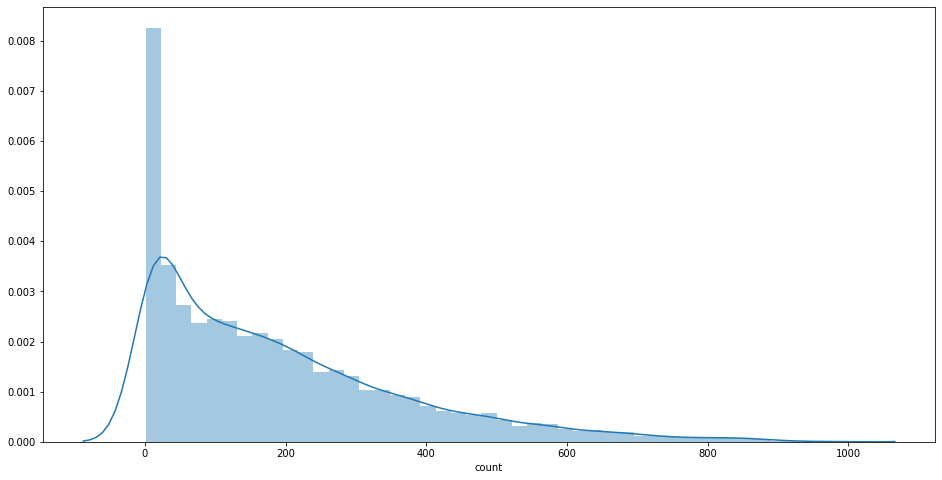

In [16]:
##Exploratory data analysis(EDA) and Feature engineering 
plt.figure(figsize=(16,8))
sns.distplot(train_df['count'])
plt.show()

(array([3474.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        7412.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

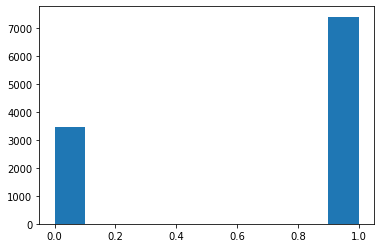

In [17]:
plt.hist(x='workingday', data=train_df)

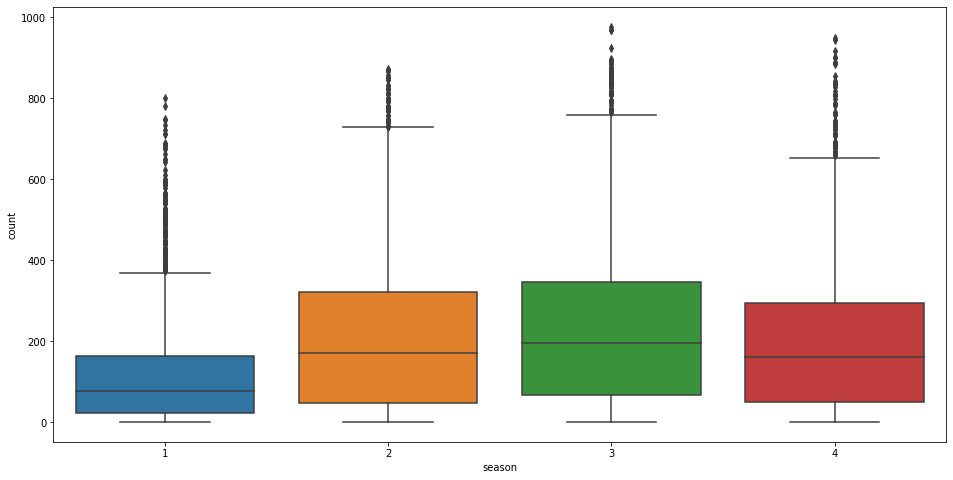

In [18]:
#Loking  for outliers
plt.figure(figsize=(16,8))
sns.boxplot(x='season', y='count', data=train_df)

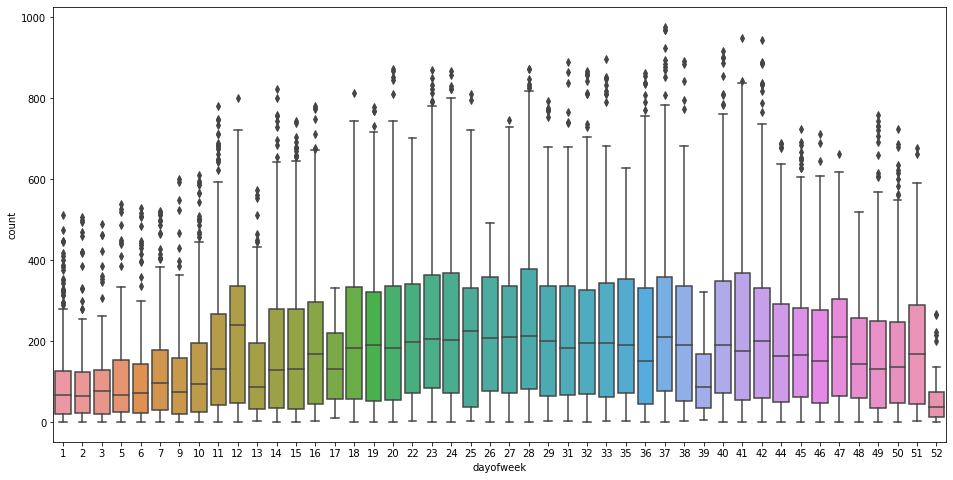

In [19]:
plt.figure(figsize=(16,8))
sns.boxplot(x='dayofweek',y='count', data=train_df)

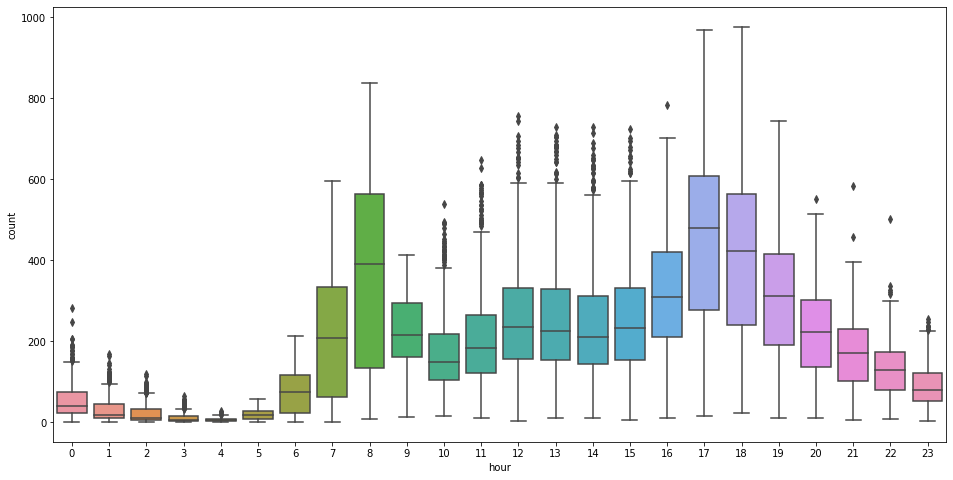

In [20]:
plt.figure(figsize=(16,8))
sns.boxplot(x='hour',y='count', data=train_df)

> Bikes are shared more in the morning and evening.

(array([1767.,  939.,  975.,  627.,  394.,  328.,  214.,  116.,   85.,
          19.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

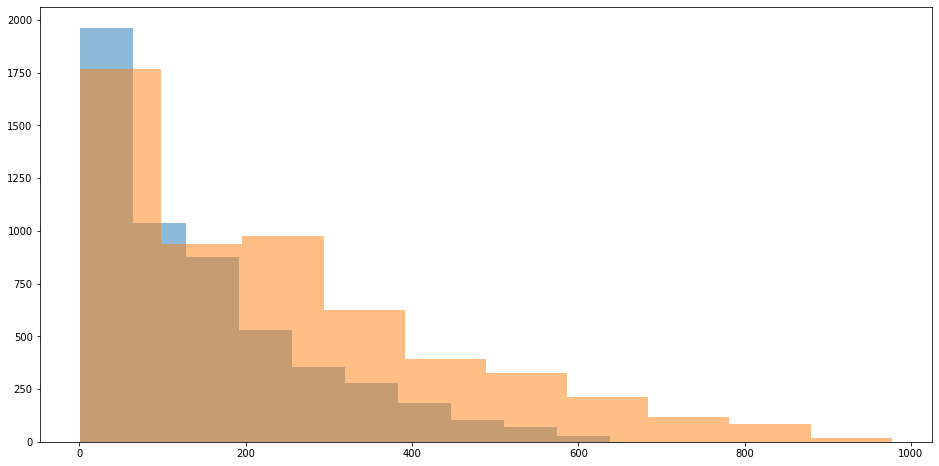

In [21]:
plt.figure(figsize=(16,8))
plt.hist(train_df['count'][train_df['year'] == 2011], alpha=0.5, label='2011')
plt.hist(train_df['count'][train_df['year'] == 2012], alpha=0.5, label='2012')


Observed that more bikes were rented in 2012 than 2011.

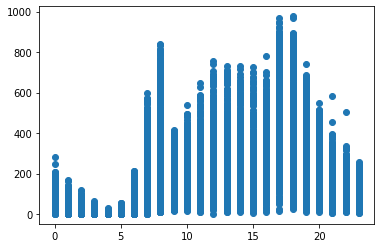

In [22]:
plt.scatter(train_df['hour'], train_df['count'])

In [0]:
del train_df['datetime']

In [24]:
Q1 = train_df.quantile(0.25)
Q3 = train_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

season          2.0000
holiday         0.0000
workingday      1.0000
weather         1.0000
temp           12.3000
atemp          14.3950
humidity       30.0000
windspeed       9.9964
casual         45.0000
registered    186.0000
count         242.0000
year            1.0000
month           6.0000
day            10.0000
hour           12.0000
dayofweek      26.0000
dtype: float64


In [0]:
train_df_without_outliers =train_df[~((train_df < (Q1 - 1.5 * IQR)) |(train_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [26]:
train_df_without_outliers.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
print(train_df.info())
print('*********************************************************************************')
print(train_df_without_outliers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null int64
month         10886 non-null int64
day           10886 non-null int64
hour          10886 non-null int64
dayofweek     10886 non-null int64
dtypes: float64(3), int64(13)
memory usage: 1.3 MB
None
*********************************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9263 entries, 0 to 10885
Data columns (total 16 columns):
season        9263 non-null int64
holiday       9263 non-null int64
workingday 

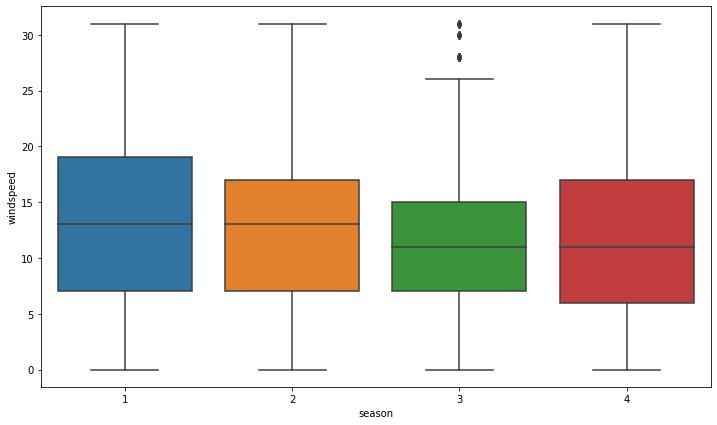

In [28]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='season',y='windspeed',data=train_df_without_outliers)

In [0]:
def wind(cols):
    windspeed = cols[0]
    season = cols[1]
    
    if windspeed==0:

        if season == 1 :
            return 14

        elif season == 2 :
            return 14

        else:
            return 13

    else:
        return windspeed

In [30]:
train_df_without_outliers['wind'] = train_df_without_outliers[['windspeed','season']].apply(wind,axis=1)
test_df['wind'] = test_df[['windspeed', 'season']].apply(wind, axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
train_df_without_outliers[['season','holiday','workingday','weather', 'year','month','day','hour','dayofweek']] = train_df_without_outliers[['season','holiday','workingday','weather', 'year','month','day','hour','dayofweek']].astype('category')
test_df[['season','holiday','workingday','weather', 'year','month','day','hour','dayofweek']] = test_df[['season','holiday','workingday','weather', 'year','month','day','hour','dayofweek']].astype('category')

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [32]:
train_df_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9263 entries, 0 to 10885
Data columns (total 17 columns):
season        9263 non-null category
holiday       9263 non-null category
workingday    9263 non-null category
weather       9263 non-null category
temp          9263 non-null float64
atemp         9263 non-null float64
humidity      9263 non-null int64
windspeed     9263 non-null float64
casual        9263 non-null int64
registered    9263 non-null int64
count         9263 non-null int64
year          9263 non-null category
month         9263 non-null category
day           9263 non-null category
hour          9263 non-null category
dayofweek     9263 non-null category
wind          9263 non-null float64
dtypes: category(9), float64(4), int64(4)
memory usage: 1.0 MB


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [0]:
X = train_df_without_outliers[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp','humidity', 'year', 'month', 'day', 'hour', 'dayofweek','wind']]
y = train_df_without_outliers['count']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [36]:
print('Training Data Size : ',X_train.shape)
print('Testing Data Size : ',X_test.shape)

Training Data Size :  (6947, 13)
Testing Data Size :  (2316, 13)


In [0]:
def modeller(X,y,model):
    model.fit(X,y)
    return model

In [0]:
# Lets build models for Random Forest Regression and Decision Tree Regression
rf = modeller(X_train,y_train,RandomForestRegressor(n_estimators = 5000,random_state= 42))
dt_reg = modeller(X_train,y_train,DecisionTreeRegressor())

In [0]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [89]:
print('Model Name \t\t\t\t| MSE')
print('-'*60)
print('Random Forest Regression \t\t|', mean_squared_error(y_test, rf.predict(X_test)))
print('-'*60)
print('Decision Tree Regression \t\t|', mean_squared_error(y_test, dt_reg.predict(X_test)))

Model Name 				| MSE
------------------------------------------------------------
Random Forest Regression 		| 1096.8865038027118
------------------------------------------------------------
Decision Tree Regression 		| 2477.7495682210706


Scatterplot for Random Forest Regression


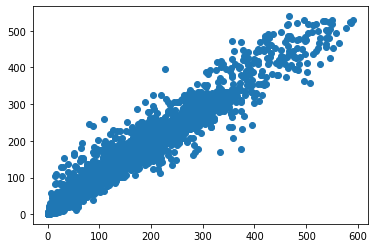

In [69]:
print('Scatterplot for Random Forest Regression')
plt.scatter(y_test,rf.predict(X_test))

Scatterplot for Decision Tree Regression


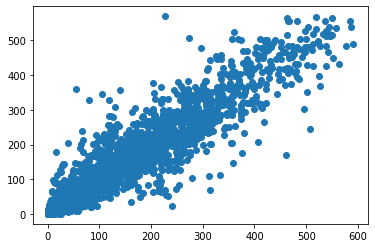

In [70]:
print('Scatterplot for Decision Tree Regression')
plt.scatter(y_test,dt_reg.predict(X_test))

In [0]:
test_pred= rf.predict(test_df[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp','humidity', 'year', 'month', 'day', 'hour', 'dayofweek','wind']])

In [0]:
test_pred = pd.DataFrame(test_pred, columns=['count'])

In [0]:
df = pd.concat([test_df, test_pred],axis=1)

In [0]:
df = df[['datetime','count']]

In [0]:
df['count'] = df['count'].astype('int')

In [87]:
df.head()

,datetime,count
0,2011-01-20 00:00:00,12
1,2011-01-20 01:00:00,6
2,2011-01-20 02:00:00,6
3,2011-01-20 03:00:00,3
4,2011-01-20 04:00:00,2
